NAMES & IDs: 

Bryant Liu - A13458492

Jingyao Chen - A92071265

Joseph D’Angelo - A13580892

Tammy Lee - A13573330

# OVERVIEW

This project will be using some of the complaints received by the Consumer Financial Protection Bureau and taking a look at the relationship between wealth and number of financial complaints. Then, we will dive deeper and see if there is a more profound relationship between wealth and different types of financial complaints regarding mortgage, checking and saving accounts, and etc. To find statistically significant correlation between two variables, we will be using the p-value test and to find how well our model fits the data, we will be calculating the r-squared value. 


# RESEARCH QUESTION

Does wealth have an impact on the types of financial complaints and the quantity of financial complaints submitted? 

# HYPOTHESIS

We believe that lower income areas will submit complaints that differ in type and quantity from higher income areas. Our reason is that people living in different income areas might pay for different types of services and therefore might encounter different types of issues when using their financial products. People from different income areas also may have issues in different financial areas than others.  Think debt problems coming from lower income areas.

# BACKGROUND & PRIOR WORK 

In “Demographic Characteristics and Complaint Behavior: An Empirical Study Concerning Turkish Customers”, Tolon Metehan and Zengin Asude Yasemin found that customer complaints are said to be very important in managing a business to keep a positive relationship between the two parties. Their results of the study people who have a higher occupational level, which means that businesses who deal with those people have to be more sensitive to about managing their customers’ complaints. 

While our question is very novel, and it does not seem that there have been a lot of published studies that are similar to this in the past, it stems from a discussion that has been ongoing for many years. This question being how does your personal wealth affect your day to day decisions and your happiness. We sought to answer this question once we came across a database containing individuals and their complaints. Moreover, this is a question of interest to our group, and more generally all college age students as our future wealth is unknown, as is our future happiness, both being things that we wish to acquire.

Many publications such as “Wealth, Poverty, and Happiness: Social Class Is Differentially Associated With Positive Emotions” by Paul K. Piff and Jake P. Moskowitz aimed to answer this very question about happiness and how wealth affects this. The findings of this paper are mostly in line with what people thought to be the answer to this question. And while it would be a huge undertaking to answer this age old question through pure data, we hope to be able to highlight some of the differences in problems that arise when moving between different social classes.

## Import

In [1]:
#import tools and packages to use later
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyzipcode import ZipCodeDatabase
from numpy import arange,array,ones
from scipy import stats

# DATASET(S)

### IRS database
The ZIP code data show all kinds of information about income and tax items classified by state, ZIP code, and size of adjusted gross income. We used the 2016 California ZIP code database which has 1598 zip codes.
https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-zip-code-data-soi

In [2]:
# 2016 California ZIP code database
df_income = pd.read_csv('irs-zipcode.csv')
df_income.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CALIFORNIA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144
0,Individual Income Tax Returns: \nSelected Inco...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[Money amounts are in thousands of dollars],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ZIP\ncode [1],Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Number of volunteer prepared returns [2],...,Total tax liability [10],NaN,Total additional Medicare tax,NaN,Net investment income tax,NaN,Tax due at time of filing [11],NaN,Overpayments refunded [12],NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,...,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount
4,NaN,NaN,(1),(2),(3),(4),(5),(6),(7),(8),...,(134),(135),(136),(137),(138),(139),(140),(141),(142),(143)
5,00000,Total,"17,532,400","8,548,270","6,211,790","2,523,550","10,861,110","35,441,880","12,566,880","292,860",...,"13,713,370","224,205,553","649,400","1,412,144","661,770","3,184,569","4,066,410","24,310,929","12,583,510","41,461,583"
6,00000,"$1 under $25,000",5975570,4192510,774400,940840,3507450,8877550,2969880,182750,...,3119640,3147718,20,9,70,110,843690,783942,4707030,9411130
7,00000,"$25,000 under $50,000",4168180,2113080,1075050,912660,2571270,8672900,3453670,85770,...,3373610,9189547,20,5,60,23,782510,1423468,3309570,8311140
8,00000,"$50,000 under $75,000",2328820,1019940,919620,344820,1454740,5086710,1842140,20100,...,2203430,12647108,60,14,60,27,614100,1616862,1657290,4443591
9,00000,"$75,000 under $100,000",1496930,521570,794530,154380,952050,3447440,1155340,3590,...,1470470,13647614,130,32,40,14,429980,1449379,1016910,3367963


### Consumer Complaint database
We used the Consumer Complaint database in data.gov. It displays the consumer complaints about financial products and services received by the Consumer Financial Protection Bureau (CFPB), a U.S. government agency that protects consumers from unfair, deceptive, or abusive practices and take action against companies that break the law. The database contains over 100,000 complaints from years 2017-2019 and is refreshed daily. However we filtered the complaints so that we would only use the ones that come from California.
https://catalog.data.gov/dataset/consumer-complaint-database#topic=consumer_navigation

Since the datasets above are not from the same year, we have to make the assumption that the 2016 tax returns are similar to that of the years between 2017 and 2019. The following shows how the csvs looked when we created dataframes to hold the data. The original csv downloaded from the Consumer Complaint database did not look like that and we will talk about what happened in the Data Cleaning section.

In [3]:
# Consumer Complaint database
df_complaints = pd.read_csv('new2.csv')
df_complaints.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,4/16/19,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",CA,92114,NaN,Consent not provided,Web,4/16/19,Closed with explanation,Yes,NaN,3213011.0
1,4/16/19,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",CA,92114,NaN,Consent not provided,Web,4/16/19,Closed with explanation,Yes,NaN,3213025.0
2,4/16/19,Debt collection,Other debt,False statements or representation,Attempted to collect wrong amount,NaN,NaN,"Diversified Consultants, Inc.",CA,93101,Older American,NaN,Postal mail,4/16/19,In progress,Yes,NaN,3213009.0
3,4/15/19,Debt collection,Payday loan debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,D2 Management LLC,CA,91729,Servicemember,NaN,Web,4/15/19,Closed with explanation,Yes,NaN,3212970.0
4,4/15/19,Debt collection,Other debt,Communication tactics,"You told them to stop contacting you, but they...",NaN,NaN,"NCC Business Services, Inc.",CA,94102,NaN,NaN,Web,4/15/19,Closed with explanation,Yes,NaN,3212808.0
5,4/15/19,Vehicle loan or lease,Loan,Incorrect information on your report,Account status incorrect,NaN,NaN,ALLY FINANCIAL INC.,CA,90027,NaN,NaN,Web,4/15/19,In progress,Yes,NaN,3212167.0
6,4/14/19,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company believes it acted appropriately as aut...,Monterey Financial Services LLC,CA,94401,NaN,Other,Web,4/14/19,Closed with explanation,Yes,NaN,3211635.0
7,4/14/19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,NaN,NaN,Grant Mercantile Agency,CA,91326,NaN,NaN,Web,4/14/19,Closed with explanation,Yes,NaN,3211535.0
8,4/14/19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,NaN,NaN,"Sequium Asset Solutions, LLC",CA,91326,NaN,NaN,Web,4/14/19,Closed with explanation,Yes,NaN,3211536.0
9,4/13/19,Debt collection,Other debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,"Account Management Services, Inc.",CA,90043,NaN,NaN,Postal mail,4/13/19,Closed with explanation,Yes,NaN,3211213.0


# DATA CLEANING 

### IRS database Cleaning 
The IRS dataset contains tax information of each region separated by zip code. We utilized the tax information to define wealth of each region. 

As you can see from the dataframe, the layout created by the csv file was misaligned and filled with null values. We made the dataframe more readable by getting rid of unnecessary information and renaming columns. From the original IRS data file, we selected the columns that show total returns and total income since they are the only information of our interest in the file. Then we drop all the columns with nan cells, rows of zip code 00000 and 99999, which corresponds to empty cells, total, and information from unknown zip code.

In [4]:
# Change column name using second row
df_income.columns = df_income.iloc[2]

# Drop 0th, 1st, nan rows; select 'Number of returns' and 'Amount' of 'Total income' columns 
df_income = df_income.drop([0, 1])
df_income = df_income.rename(index=str, columns={'ZIP\ncode [1]': 'ZIP code'})
df_income = df_income.rename(index=str, columns={'Number of returns': 'Number'})
df_income = df_income.set_index('ZIP code')

# Drop na rows
df_income_selected = df_income.iloc[:, [16, 17]]
df_income_selected = df_income_selected.dropna()
df_income_selected.columns = ['Number of returns', 'Amount']

# Drop zip code 00000 and 99999
df_income_selected = df_income_selected.drop(['00000', '99999'])

df_income_selected.head(10)

,Number of returns,Amount
ZIP code,,
NaN,Number of returns,Amount
NaN,(16),(17)
90001,"21,670","619,635"
90001,11890,171277
90001,7020,245583
90001,1940,116362
90001,560,47795
90001,240,28531
90001,20,10087


Then we drop the all rows except the first row of each zip code, which indicates the sum of all categories of each region. 
After that, we created a new column called 'wealth' to calculate the average income (amount / total returns) and multiplied the result by 1000 because the amount is in thousands.

In [5]:
# Drop all rows but the first, which is total returns and amount
df_income_selected = df_income_selected.loc[~df_income_selected.index.duplicated(keep='first')]
df_income_selected = df_income_selected.reset_index()
df_income_selected = df_income_selected.drop([0])

# Set index to be Zip Code
df_income_selected = df_income_selected.set_index('ZIP code')
df_income_selected = df_income_selected.rename(index=str, columns={'Number of returns': 'Number'})

# Remove commas so that the numbers can be converted to integers
df_income_selected['Amount'] = df_income_selected['Amount'].str.replace(',', '')
df_income_selected['Number'] = df_income_selected['Number'].str.replace(',', '')
df_income_selected['Amount'] = pd.to_numeric(df_income_selected['Amount'])
df_income_selected['Number'] = pd.to_numeric(df_income_selected['Number'])

# Make standardized wealth number by dividing amount of money by number of returns
# Then multiplying by 1000 because money is in thousands
df_income_selected['Wealth'] = df_income_selected.apply(lambda x: (x.Amount / x.Number) * 1000, axis=1)
df_income = df_income_selected
df_income.head()

,Number,Amount,Wealth
ZIP code,,,
90001,21670,619635,28594.139363
90002,19890,563172,28314.328808
90003,27290,730810,26779.406376
90004,27810,1995586,71757.856886
90005,15850,807743,50961.703470


### Consumer Complaints Database Cleaning
We did pre process cleaning by choosing the data set that had the most recent and full database of consumer complaints. The data was somewhat clean when we got it, the data set contained a good amount of blank rows as therefore we needed to clean those lines out. 

For the overall database, we cleaned it by removing data we didn’t want as well as data rows that are incomplete. First we dropped all rows not from the state of California, this is done not only to remove data that we are not considering, but also to reduce the dataset’s csv file size from over .4GB to under 15MB. Dropping all non-California states is done by using the given column for states within the dataframe. Then we dropped all the columns that we are not referencing from, this is done first because we do not want to drop rows that had blank data but in columns that we are not interested in. 

For individual columns cleaning, we targeted each column of interest one by one. The first column was the zipcode, we cleaned this by first dropping all rows with blank zip codes. After that we realized there are some zip code data with X’s in them, which meant that the person that submitted the complaint chose the option to hide their zip code. We cleaned out this problem by dropping all lines with checking if ‘X’ exist in the zip code. 
After all the data cleaning so far, we saved the resulting data cleaning file in a new csv file to import into jupyter-notebooks later on. This is suggested to do on a local computer as the original dataset is a very large file, GitHub will not accept such a large file size originally. 


#### Code to clean up csv, removes all the states not from california and zip codes with 'X''s in them
import pandas

df = pandas.read_csv('new.csv')

df2 = df.ix[~(df['State'] != 'CA')]

df2 = df2.dropna(subset=['ZIP code'])

result = df2[~df2['ZIP code'].str.contains('X')]

result.to_csv("new2.csv", encoding='utf-8', index=False)

We futher cleaned out the dataframe by getting rid of zip codes that did not fit in California's set of zip codes. For the columns of interest, we had some distribution issues within some of those columns. There are data that has too few occurrences in terms of complaints category, which we then removed as it is not representative enough. 

In [6]:
# Remove all of the unimportant columns from our dataframe
df_complaints = df_complaints.drop(columns=['Date received', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative',
                                           'Company public response', 'Company', 'State', 'Tags', 'Consumer consent provided?',
                                           'Submitted via', 'Date sent to company', 'Company response to consumer', 
                                           'Timely response?', 'Consumer disputed?', 'Complaint ID'])

# Remove weird zip codes
df_complaints = df_complaints[df_complaints['ZIP code'] >= 90001]
df_complaints = df_complaints.sort_index()

df_complaints.head()

,Product,ZIP code
0,Debt collection,92114
1,Debt collection,92114
2,Debt collection,93101
3,Debt collection,91729
4,Debt collection,94102


Finally, we squished the dataframe so that a unique ZIP code will be matched with the number of a specific complaint.

In [7]:
# Create groups for unique zip codes and unique products
df_complaints_groups = df_complaints.groupby(['ZIP code', 'Product'])
df_complaints_2 = pd.DataFrame(columns = ['ZIP code'])

# In each group, get the length which represents 
for key, item in df_complaints_groups:
    # Make new column with complaint type being the header and amount of that complaint being the type
    group_length = len(df_complaints_groups.get_group(key))
    df_complaints_2 = df_complaints_2.append({'ZIP code' : int(key[0]), key[1] : group_length}, ignore_index=True)

# Convert na to 0's for adding purposes
df_complaints_2 = df_complaints_2.fillna(int(0))

# Sum all unique zip codes to get one row per zip code
grouped_df = df_complaints_2.groupby('ZIP code').sum()

grouped_df.head()

,Checking or savings account,Consumer Loan,Credit reporting,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,Mortgage,Credit card or prepaid card,Student loan,Bank account or service,"Payday loan, title loan, or personal loan",Vehicle loan or lease,Credit card,"Money transfer, virtual currency, or money service",Payday loan,Prepaid card,Money transfers,Other financial service
ZIP code,,,,,,,,,,,,,,,,,
90001.0,3.0,1.0,4.0,28.0,22.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90002.0,0.0,0.0,0.0,21.0,13.0,3.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90003.0,3.0,0.0,0.0,40.0,9.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90004.0,7.0,0.0,0.0,13.0,8.0,3.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
90005.0,1.0,0.0,5.0,5.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Combining two datasets and data modification: 
After cleaning for two databases, they are combined together for the convenience of analysis. Then the total number of complaints are calculated. Since population also affects the number of complaints in each region, the numbers of total complaints and specific complaints were normalized by dividing them by the population. Because we do not have the exact total population of each area, we assume that the number of tax return can be representative for the total population.

In [8]:
# Convert index to string for combining purposes
grouped_df.index = grouped_df.index.astype('int')
grouped_df.index = grouped_df.index.astype('str')
df_income.index = df_income.index.astype('str')

# Combine the two dataframes and drop the rows that don't appear in both
complaints_df = pd.concat([grouped_df, df_income], axis=1, sort=False)
complaints_df = complaints_df.dropna()

# Create total complaints by adding all complaints for a zip code
complaints_df['Total Complaints'] = grouped_df.sum(axis=1)

complaints_df.head()

,Checking or savings account,Consumer Loan,Credit reporting,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,Mortgage,Credit card or prepaid card,Student loan,Bank account or service,"Payday loan, title loan, or personal loan",...,Credit card,"Money transfer, virtual currency, or money service",Payday loan,Prepaid card,Money transfers,Other financial service,Number,Amount,Wealth,Total Complaints
90001,3.0,1.0,4.0,28.0,22.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21670.0,619635.0,28594.139363,64.0
90002,0.0,0.0,0.0,21.0,13.0,3.0,4.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19890.0,563172.0,28314.328808,48.0
90003,3.0,0.0,0.0,40.0,9.0,4.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27290.0,730810.0,26779.406376,59.0
90004,7.0,0.0,0.0,13.0,8.0,3.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27810.0,1995586.0,71757.856886,41.0
90005,1.0,0.0,5.0,5.0,7.0,3.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,15850.0,807743.0,50961.703470,23.0


Here we show how the distribution of region in California are accounted for before and after we drop the outliers. We decided that the outliers are any data points where the area had less than 5 complaints in total or if the wealth was obscenely high (over 500000).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


Text(0.5, 0.98, 'Map Before Dropping Outliers')

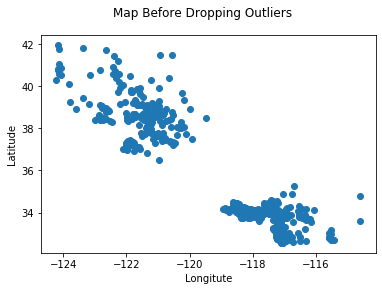

In [9]:
zcdb = ZipCodeDatabase()

# Iterrate over rows to add Lat and Long to dataframe
for index, row in complaints_df.iterrows():    
    zipcode = zcdb[index]
    complaints_df.set_value(index,'Latitude',zipcode.latitude)
    complaints_df.set_value(index,'Longitude',zipcode.longitude)

# Plot scatter plot with Long and Lat
plt.plot(complaints_df['Longitude'], complaints_df['Latitude'],'o')
plt.xlabel('Longitute')
plt.ylabel('Latitude')
plt.suptitle('Map Before Dropping Outliers')

Text(0.5, 0.98, 'Wealth vs. Total Complaints Before Dropping Outliers')

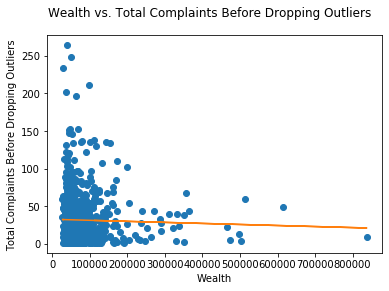

In [10]:
y = complaints_df['Total Complaints']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Total Complaints Before Dropping Outliers')
plt.suptitle('Wealth vs. Total Complaints Before Dropping Outliers')

In [11]:
# Drop some outliers
complaints_df.drop( complaints_df[ complaints_df['Total Complaints'] < 15 ].index , inplace=True)
complaints_df.drop( complaints_df[ complaints_df['Wealth'] > 500000 ].index , inplace=True)

Text(0.5, 0.98, 'Map After Dropping Outliers')

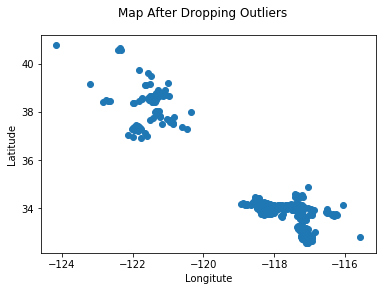

In [12]:
# Plot again after dropping outliers
plt.plot(complaints_df['Longitude'], complaints_df['Latitude'],'o')
plt.xlabel('Longitute')
plt.ylabel('Latitude')
plt.suptitle('Map After Dropping Outliers')

Text(0.5, 0.98, 'Wealth vs. Total Complaints Before Dropping Outliers')

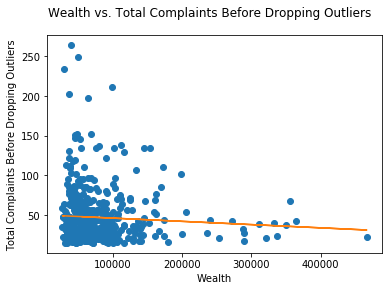

In [13]:
y = complaints_df['Total Complaints']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Total Complaints Before Dropping Outliers')
plt.suptitle('Wealth vs. Total Complaints Before Dropping Outliers')

We created another dataframe to neatly list out all the complaint categories with the total number of complaints received that belong to the category. We decided that categories with less than 1000 complaints were not enough to show statiscally significant results so we dropped the categories in the dataframe above. 

In [14]:
# Shows all the complaint categories and counts the number for each one
complaints_num_df = pd.DataFrame()
column_list = complaints_df.columns.tolist()

complaints_num_df['Number of Complaints'] = complaints_df.sum().astype(int)
complaints_num_df

,Number of Complaints
Checking or savings account,1911
Consumer Loan,44
Credit reporting,454
"Credit reporting, credit repair services, or other personal consumer reports",10079
Debt collection,3681
Mortgage,2378
Credit card or prepaid card,1759
Student loan,455
Bank account or service,153
"Payday loan, title loan, or personal loan",263


In [15]:
# Get rid of complaint types that have less than 1000 number of complaints
to_drop = (complaints_num_df[complaints_num_df['Number of Complaints'] < 1000].index).tolist()
complaints_df = complaints_df.drop(columns=to_drop)

complaints_df.head()

,Checking or savings account,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,Mortgage,Credit card or prepaid card,Number,Amount,Wealth,Total Complaints,Latitude
90001,3.0,28.0,22.0,6.0,0.0,21670.0,619635.0,28594.139363,64.0,33.9731
90002,0.0,21.0,13.0,3.0,4.0,19890.0,563172.0,28314.328808,48.0,33.9497
90003,3.0,40.0,9.0,4.0,1.0,27290.0,730810.0,26779.406376,59.0,33.9653
90004,7.0,13.0,8.0,3.0,5.0,27810.0,1995586.0,71757.856886,41.0,34.0762
90005,1.0,5.0,7.0,3.0,1.0,15850.0,807743.0,50961.703470,23.0,34.0585


In [16]:
# Create index columns for the larger complaint types.
# these were created by dividing the amount of these complaints
# by the total complaints for the zip code to get out the frequency
# that a certain zip code complains about certain things
complaints_df['Checking or savings account'] = complaints_df['Checking or savings account'] / complaints_df['Total Complaints']
complaints_df['Credit reporting, credit repair services, or other personal consumer reports'] = complaints_df['Credit reporting, credit repair services, or other personal consumer reports'] / complaints_df['Total Complaints']
complaints_df['Debt collection'] = complaints_df['Debt collection'] / complaints_df['Total Complaints']
complaints_df['Mortgage'] = complaints_df['Mortgage'] / complaints_df['Total Complaints']
complaints_df['Credit card or prepaid card'] = complaints_df['Credit card or prepaid card'] / complaints_df['Total Complaints']

# Total complaint score = ( Total Complaints / Number of returns ) * 1000
complaints_df['Total Complaints Score'] = complaints_df['Total Complaints'] / complaints_df['Number'] * 1000

complaints_df.head()

,Checking or savings account,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,Mortgage,Credit card or prepaid card,Number,Amount,Wealth,Total Complaints,Latitude,Total Complaints Score
90001,0.046875,0.437500,0.343750,0.093750,0.000000,21670.0,619635.0,28594.139363,64.0,33.9731,2.953392
90002,0.000000,0.437500,0.270833,0.062500,0.083333,19890.0,563172.0,28314.328808,48.0,33.9497,2.413273
90003,0.050847,0.677966,0.152542,0.067797,0.016949,27290.0,730810.0,26779.406376,59.0,33.9653,2.161964
90004,0.170732,0.317073,0.195122,0.073171,0.121951,27810.0,1995586.0,71757.856886,41.0,34.0762,1.474290
90005,0.043478,0.217391,0.304348,0.130435,0.043478,15850.0,807743.0,50961.703470,23.0,34.0585,1.451104


# DATA ANALYSIS & RESULTS

### Distribution
According to the histogram with wealth and number of zipcodes, the wealth distribution is unimodal and right-skewed, where the data on the right are regions in California where people make a lot of money. The other histogram shows that the distribution of total complaint score is also unimodel and right skewed where some areas have a large ratio of total complaints to the population of the region.

Text(0.5, 0.98, 'Wealth Distribution')

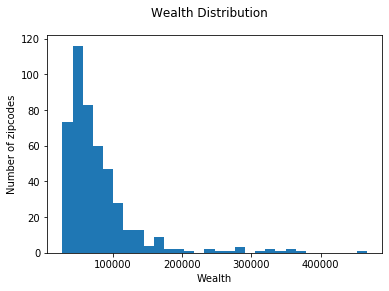

In [17]:
plt.hist(complaints_df['Wealth'], bins=30)
plt.xlabel('Wealth')
plt.ylabel('Number of zipcodes')
plt.suptitle('Wealth Distribution')

Text(0.5, 0.98, 'Total Complaints Score Distribution')

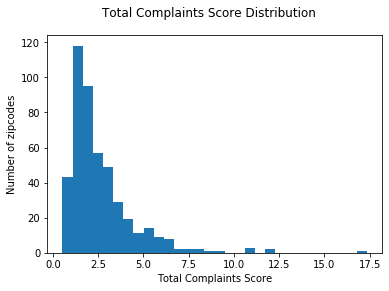

In [18]:
plt.hist(complaints_df['Total Complaints Score'], bins=30)
plt.xlabel('Total Complaints Score')
plt.ylabel('Number of zipcodes')
plt.suptitle('Total Complaints Score Distribution')

### Scatterplot for Total Complaints Score vs. Wealth
This is the scatterplot for total complaints score vs. wealth. There seems to be no observable association between the wealth and the total complaints score of each region. 

Text(0.5, 0.98, 'Total Complaints Score vs Wealth')

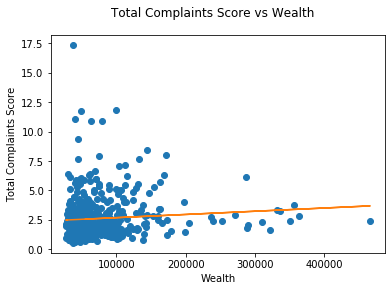

In [19]:
y = complaints_df['Total Complaints Score']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value_total_complaints, p_value_total_complaints, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Total Complaints Score')
plt.suptitle('Total Complaints Score vs Wealth')

### Scatterplot for Credit card or prepaid card vs. Wealth
There is a slight positive association between Wealth and Complaint Score of Credit Card or Prepaid Card. Although most of the data points cluster at the region of lower wealth and lower specific complaint score, it still can be observed that the higher the wealth of the people living in an area, the higher the credit card or prepaid card complaint score of the area.

Text(0.5, 0.98, 'Credit card or prepaid card vs Wealth')

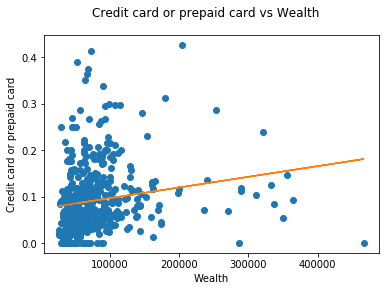

In [20]:
y = complaints_df['Credit card or prepaid card']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value_account, p_value_account, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Credit card or prepaid card')
plt.suptitle('Credit card or prepaid card vs Wealth')

### Scatterplot for Checking or savings account vs. Wealth
There is a slight positive association between Wealth and Complaint Score of Checking or savings account. Although most of the data points cluster at the region of lower wealth and lower specific complaint score, it still can be observed that the higher the wealth of the people living in an area, the higher the Checking or savings account complaint score of the area.

Text(0.5, 0.98, 'Checking or savings account vs Wealth')

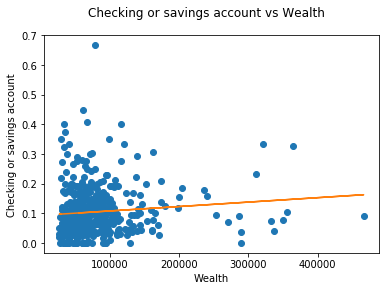

In [21]:
y = complaints_df['Checking or savings account']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value_cards, p_value_cards, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Checking or savings account')
plt.suptitle('Checking or savings account vs Wealth')

### Scatterplot for Credit Reporting, Credit Repair Services, or Other Personal Consumer Reports Score vs. Wealth
There is a slight negative association between Wealth and Complaint Score of  Credit Reporting, Credit Repair Services, or Other Personal Consumer Reports. Most of the points cluster at the region of lower wealth, and the specific complaint score for poor region has large diversity, while the specific complaint score for wealthy region is relatively low compared with the poor area. 

Text(0.5, 0.98, 'Credit reporting, credit repair services, or other personal consumer reports vs Wealth')

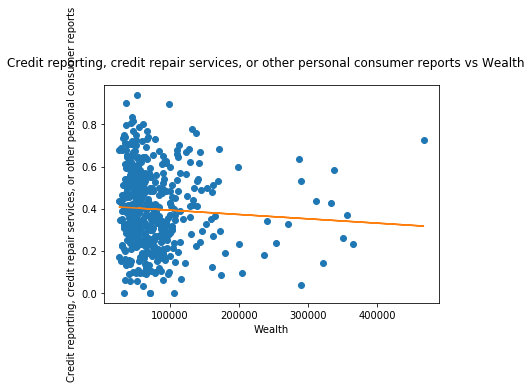

In [22]:
y = complaints_df['Credit reporting, credit repair services, or other personal consumer reports']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value_credit, p_value_credit, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Credit reporting, credit repair services, or other personal consumer reports')
plt.suptitle('Credit reporting, credit repair services, or other personal consumer reports vs Wealth')

### Scatterplot for Wealth vs. Mortgage Score 
Judging from the scatterplot, there seems to be a very slight positive relationship between wealth of an area by zip code and the complaint score for mortgage. 

Text(0.5, 0.98, 'Morgage vs Wealth')

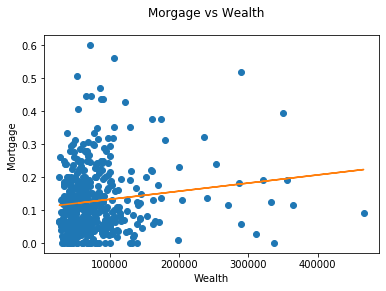

In [23]:
y = complaints_df['Mortgage']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value_mortgage, p_value_mortgage, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Mortgage')
plt.suptitle('Morgage vs Wealth')

### Scatterplot for Wealth vs. Debt Collection
The regression line shows that there seems to be a relatively strong negative relationship between wealth of an area by zip code and the complaint score for debt collection. 

Text(0.5, 0.98, 'Debt collection vs Wealth')

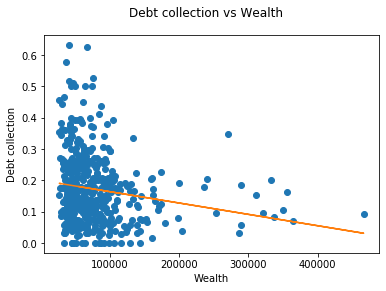

In [24]:
y = complaints_df['Debt collection']
x = complaints_df['Wealth']

# Using scipy get some stats from the x and y data
slope, intercept, r_value_debt, p_value_debt, std_err = stats.linregress(x, y)

# Calculate line of best fit
line = slope*x+intercept

# Plot our data
plt.plot(x, y,'o', x, line)
plt.xlabel('Wealth')
plt.ylabel('Debt collection')
plt.suptitle('Debt collection vs Wealth')

### P-value test and what r-squared tells us

In [25]:
def check_p_val(p_val, alpha = 0.05):

    if p_val < alpha:
        return 'We have evidence to reject the null hypothesis.'
    else:
        return 'We do not have evidence to reject the null hypothesis.'

print("Total Complaints Score p-value: " + str(p_value_total_complaints))
print(check_p_val(p_value_total_complaints))
print("Credit card or prepaid card index p-value: " + str(p_value_cards))
print(check_p_val(p_value_cards))
print("Credit reporting, credit repair services, or other personal consumer reports index p-value: " + str(p_value_account))
print(check_p_val(p_value_account))
print("Checking or savings account index p-value: " + str(p_value_credit))
print(check_p_val(p_value_credit))
print("Mortgage index p-value: " + str(p_value_mortgage))
print(check_p_val(p_value_mortgage))
print("Debt collection index p-value: " + str(p_value_debt))
print(check_p_val(p_value_debt))

print()

print("Total Complaints Score r-squared: " + str(r_value_total_complaints * r_value_total_complaints))
print("Credit card or prepaid card index r-squared: " + str(r_value_cards * r_value_cards))
print("Credit reporting, credit repair services, or other personal consumer reports index r-squared: " + str(r_value_account * r_value_account))
print("Checking or savings account index r-squared: " + str(r_value_credit * r_value_credit))
print("Mortgage index r-squared: " + str(r_value_mortgage * r_value_mortgage))
print("Debt collection index r-squared: " + str(r_value_debt * r_value_debt))


Total Complaints Score p-value: 0.08384387033329412
We do not have evidence to reject the null hypothesis.
Credit card or prepaid card index p-value: 0.02929826682901218
We have evidence to reject the null hypothesis.
Credit reporting, credit repair services, or other personal consumer reports index p-value: 0.00023495000256787733
We have evidence to reject the null hypothesis.
Checking or savings account index p-value: 0.18840859592817444
We do not have evidence to reject the null hypothesis.
Mortgage index p-value: 0.003320915636909934
We have evidence to reject the null hypothesis.
Debt collection index p-value: 0.00014215660470885512
We have evidence to reject the null hypothesis.

Total Complaints Score r-squared: 0.006427508733716662
Credit card or prepaid card index r-squared: 0.01019576742387694
Credit reporting, credit repair services, or other personal consumer reports index r-squared: 0.02876606204803677
Checking or savings account index r-squared: 0.0037255486526098047
Mort

With the given p-value and 0.05 as the alpha value, the check_p_val function returns a statement to show whether or not there is evidence to reject the null hypothesis, where the null hypothesis says that there is no statistically significant relationship on how the given complaint category has an effect on the wealth of an area by zip code. To summarize the results from above, the p-values of the complaint categories—credit card or prepaid card; credit reporting, credit repair, services, or other personal consumer reports; checking or savings account; and debt collection—are all less than the alpha level (0.05) which means that is evidence to reject the null hypothesis and accept the alternative hypothesis that there is a relationship between the respective complaint category and the wealth of an area by zip code. However, all the r-squared values of the complaint categories are very close to 0 which indicates that only a small proportion of variation in the regression equation is accounted for, and the equation cannot make good predictions for the y values based on the x values. As for the total complaints and mortgage complaints both have p-values larger than the alpha, which means that there is not enough evidence to reject the null hypothesis. 

# ETHICS & PRIVACY

For the consumer complaints data from data.gov, the datasets are both public and anonymized. The data only shows the complaint’s origin zip code and has no revealing information regarding the consumer that submitted the data. This method of displaying data follows the Safe Harbour Method. Individuals that wanted extra anonymity could have their last three digits of their zip codes removed.

For IRS income data, there are few concerns revolving ethics and privacy as well. The data comes from a public and official source. The data set does not reveal any private and identifying information about the person that submitted the tax return, as any information about the person is their zip code. With zip codes with too few data points the income information is hidden to prevent easy guess of who those individuals are, because it means for that zip code there is only a couple of individuals. Obtaining this data fulfills the Safe Harbour Method criteria. Overall we do not believe that public IRS data has much revealing information.

For both of these datasets, they are provided on a public and official source, meaning that we have permission to use for analysis. Privacy concerns has been mostly handled when we received the data anonymously. The possibility of bias within our dataset is always there, but with such a large data set, it is unlikely to have any. Both data sets are from government sources, meaning that bias is unlikely to exist. But if we find any possible problems in terms of privacy or bias, we will most likely remove that data. This is fine with our dataset because of the vast number of datapoints we have.

One potential source of bias would come from IRS income data from people that did not report their taxes. There are people that do not submit their income, which would make our data not fully representative of the population of the corresponding zip code. But, it is unlikely that there are a significant amount of people doing this so the dataset from the IRS is most likely to still be sufficient for our analysis as we are not looking at individual’s data but the average.


# CONCLUSION & DISCUSSION

To study the association between wealth and type of financial complains of a region in California, the project cleans and analyzes IRS tax data and product complaints data from the California. Based on the scatter plot, regression, R-square, and the p-value tests results, it can be concluded that there is no association between the total number of complaints and wealth. In addition, there is a weak positive association between wealth and the complaint score of the product Credit Card or Prepaid Card, Checking or Savings Account, and Mortgage with the previous two products statistically significant. Such finding might indicate that the poorer area might tend to have more complaints relevant to these types of products. However, the R-square values for regression lines of all three sets of data are close to zero, indicating that the regression equations are not the most favorable model for making predictions of complaints score based on the wealth level of a region. Moreover, there is a weak negative association between wealth and complaint score of the product Credit Reporting, Credit Repair Services, or Other Personal Consumer Reports and Debit Collection, both products are statistically significant based on the p-value tests. Such finding indicates that the wealthier the region might tend to have more complaints relevant to these types of products. However, the R-squared values for these two regression equations are also quite close to 0, showing that the model might not be able to make good predictions for complaint score of a region based on wealth. In short, the low p-value shows that our data is statistically significant and there is specific pattern between two variables but the R-squared value also shows that the regression model is not the most accurate and two variables might not be linearly associated. 

The limitations of our project is that although the p-value shows that there is a pattern between the wealth and the specific complaints score, we fail to find the best fit model for two variables. This might be caused by oversimplifying the model, overlooking confounding variable, or utilizing the wrong regression fitting model. For the future research, different models could be tested on the data sets to discover the association between two variables. Such study would be beneficial for the social development in that banks can adjust and improve their financial products based on what the consumers of a region care the most and complain the most. In this way, not only the banks can enjoy better reputation within the consumers, consumers can also have a better experience of using the financial products. 


# References

Piff, P.K., & Moskowitz, J.P. (2017). Wealth, poverty, and happiness: Social class is differentially associated with positive emotions. Emotion, 18 6, 902-905.

Metehan, T., & Yasemin, Z.A. (2011). Demographic Characteristics and Complaint Behavior: An Empirical Study Concerning Turkish Customers.
